# Mini Project

# NASA Star Type Classification

We have a set of 240 Stars with 5 Types. We will use Classification ML Models to predict the different Star Types from 0 to 5:<br>
* Red Dwarf - 0
* Brown Dwarf - 1
* White Dwarf - 2
* Main Sequence - 3
* Super Giants - 4
* Hyper Giants - 5

For more information about the dataset use the following Kaggle link:<br>
https://www.kaggle.com/datasets/brsdincer/star-type-classification

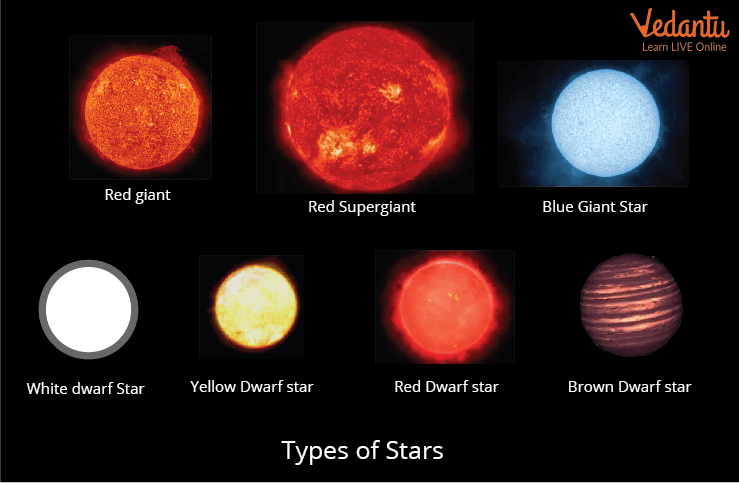

# Import Libraries and Load Data

In [1]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",120)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename)) # file path

/kaggle/input/star-type-classification/Stars.csv


In [2]:
# load data
df=pd.read_csv("/kaggle/input/star-type-classification/Stars.csv")

# EDA - Exploratory Data Analysis

In [3]:
df.head() # first 5 entries

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,Red,M,0
1,3042,0.000500,0.1542,16.60,Red,M,0
2,2600,0.000300,0.1020,18.70,Red,M,0
3,2800,0.000200,0.1600,16.65,Red,M,0
4,1939,0.000138,0.1030,20.06,Red,M,0


In [4]:
df.info() # infos about the samples, features and datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Temperature     240 non-null    int64  
 1   L               240 non-null    float64
 2   R               240 non-null    float64
 3   A_M             240 non-null    float64
 4   Color           240 non-null    object 
 5   Spectral_Class  240 non-null    object 
 6   Type            240 non-null    int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 13.2+ KB


In [5]:
df.isnull().sum() # checking for missing values

Temperature       0
L                 0
R                 0
A_M               0
Color             0
Spectral_Class    0
Type              0
dtype: int64

We have a total amount of 240 samples, 7 features and some missing values.

In [6]:
df.describe() # statistical infos about features

,Temperature,L,R,A_M,Type
count,240.000000,240.000000,240.000000,240.000000,240.000000
mean,10497.462500,107188.361635,237.157781,4.382396,2.500000
std,9552.425037,179432.244940,517.155763,10.532512,1.711394
min,1939.000000,0.000080,0.008400,-11.920000,0.000000
25%,3344.250000,0.000865,0.102750,-6.232500,1.000000
50%,5776.000000,0.070500,0.762500,8.313000,2.500000
75%,15055.500000,198050.000000,42.750000,13.697500,4.000000
max,40000.000000,849420.000000,1948.500000,20.060000,5.000000


In [7]:
df.corr() # the correlation between the features

,Temperature,L,R,A_M,Type
Temperature,1.000000,0.393404,0.064216,-0.420261,0.411129
L,0.393404,1.000000,0.526516,-0.692619,0.676845
R,0.064216,0.526516,1.000000,-0.608728,0.660975
A_M,-0.420261,-0.692619,-0.608728,1.000000,-0.955276
Type,0.411129,0.676845,0.660975,-0.955276,1.000000


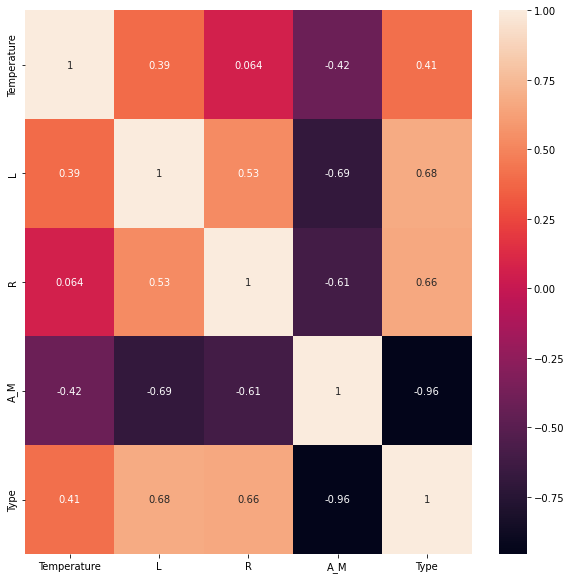

In [8]:
# Correlation of the columns shown in a heatmap
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True);

## Data Visualization & Data Preprocessing

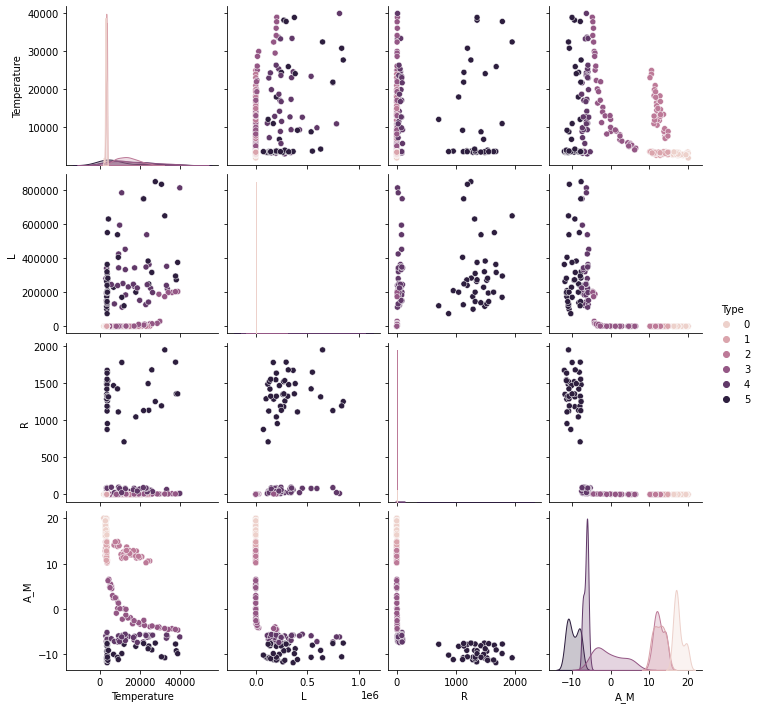

In [9]:
sns.pairplot(data=df, hue='Type'); # pairplot all columns

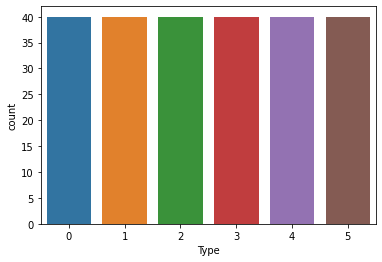

In [10]:
sns.countplot(x=df.Type); # plot Type column

We have an even distribution of Star Types.

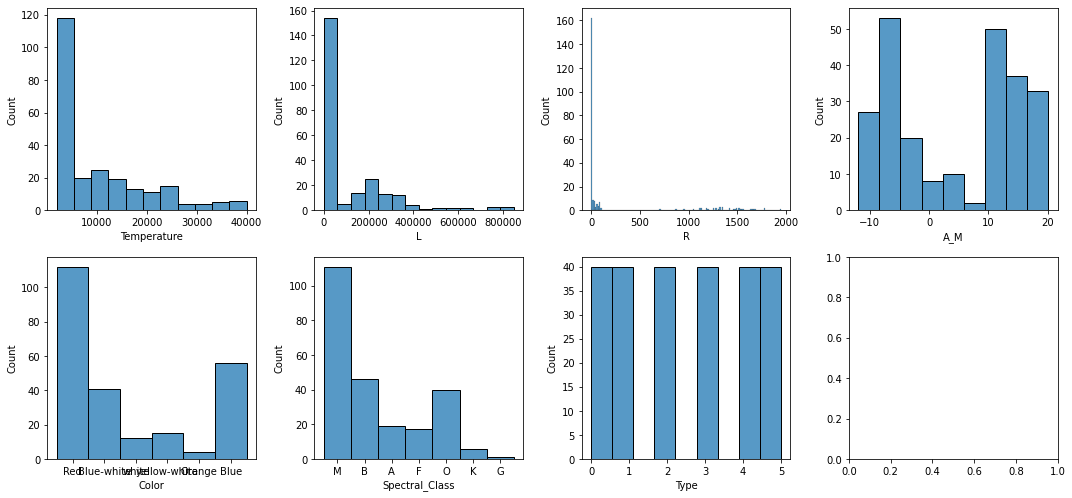

In [23]:
# create histplots for each column
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15,7))
axes = axes.flatten()

# Create a histplot for each column in the DataFrame
for ax, col in zip(axes, df.columns):
    sns.histplot(data=df, x=col, ax=ax)
plt.tight_layout()
plt.show()

### Feature Engineering

In [21]:
# combine the colors which are same but written differtently
replacements = { # this was shorten as much as possible with ChatGPT
    r'Blue[\s-]?White|Blue white': 'Blue-white',
    r'yellowish|Yellowish|Yellowish White|yellow-white white|white-Yellow': 'yellow-white',
    r'White|Whitish': 'white',
    r'Orange-Red|Pale yellow orange': 'Orange'
}
df.replace(replacements, regex=True, inplace=True) # let this code run 2 times

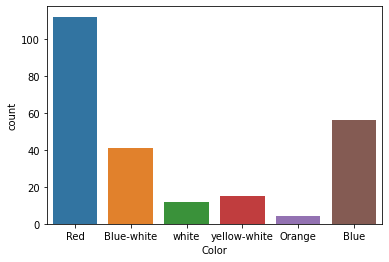

In [22]:
sns.countplot(x=df.Color);

# Modelling

In [14]:
# Function to call all Classification Algorithms
def classification_funct(dataset,column_to_be_studied):
    #importing Classification libraries
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.linear_model import LogisticRegression
    from xgboost import XGBClassifier
    
    from sklearn.model_selection import train_test_split
    from imblearn.over_sampling import SMOTE
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    
    from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
    from sklearn.metrics import confusion_matrix,classification_report
       
    # assign x and y
    dataset=dataset[dataset[column_to_be_studied].notnull()]
    x,y=dataset.drop(column_to_be_studied,axis=1),dataset[[column_to_be_studied]]   
    x=pd.get_dummies(x,drop_first=True) # one-hot encoding
    scaler.fit(x) # Scale the features
    x = scaler.transform(x)
    # split data in train and test
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
    
    # create an instance of each classification algorithm
    R=RandomForestClassifier()
    Log=LogisticRegression()
    XGB=XGBClassifier()
    
    algos=[R,Log,XGB]
    algo_names=['RandomForestClassifier','LogisticRegression','XGBClassifier']
   
    accuracy_scored=[]
    precision_scored=[]
    recall_scored=[]
    f1_scored=[]
    
    for item in algos:
        item.fit(x_train,y_train)
        item.predict(x_test)
        accuracy_scored.append(accuracy_score(y_test,item.predict(x_test)))
        precision_scored.append(precision_score(y_test, item.predict(x_test), average='macro'))
        recall_scored.append(recall_score(y_test, item.predict(x_test), average='macro'))
        f1_scored.append(f1_score(y_test, item.predict(x_test), average='macro'))
    
    # create dataframe with results
    result=pd.DataFrame(columns=['f1_score','recall_score','precision_score','accuracy_score'],index=algo_names)
    result['f1_score']=f1_scored
    result['recall_score']=recall_scored
    result['precision_score']=precision_scored
    result['accuracy_score']=accuracy_scored
    return result.sort_values('accuracy_score',ascending=False)

In [15]:
classification_funct(df,"Type")  # call classification function and see results in a Dataframe

,f1_score,recall_score,precision_score,accuracy_score
RandomForestClassifier,1.000000,1.000000,1.00000,1.000000
XGBClassifier,1.000000,1.000000,1.00000,1.000000
LogisticRegression,0.976068,0.979167,0.97619,0.979167


Since our dataset is very small, the results are not that logic, but **LogisticRegression** shows an **Accuracy of 97,92%**.

# Evaluation - Confusion Matrix

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, plot_confusion_matrix

In [17]:
x,y=df.drop('Type',axis=1),df[['Type']]  # assign x and y
x=pd.get_dummies(x,drop_first=True) # one-hot encoding
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [32]:
model = LogisticRegression() # fit and predict model
y_preds = model.fit(x_train, y_train).predict(x_test)

In [33]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.62      1.00      0.76         8
           1       1.00      0.29      0.44         7
           2       0.67      1.00      0.80         6
           3       1.00      0.50      0.67         8
           4       0.89      1.00      0.94         8
           5       1.00      1.00      1.00        11

    accuracy                           0.81        48
   macro avg       0.86      0.80      0.77        48
weighted avg       0.88      0.81      0.79        48



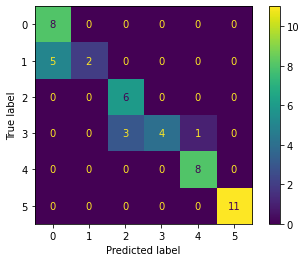

In [34]:
plot_confusion_matrix(model,x_test,y_test);